# 🌞 Solar Power Output Analysis
This project analyzes solar power generation data using Python (pandas, matplotlib, seaborn).

## 🔹 Step 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
sns.set(style='whitegrid')

## 🔹 Step 2: Load Dataset

In [7]:
gen_df = pd.read_csv('/content/Plant_1_Generation_Data.csv')
gen_df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


## 🔹 Step 3: Explore Dataset

In [8]:
print(gen_df.info())
print(gen_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB
None
        PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    41

## 🔹 Step 4: Convert DATE_TIME Column

In [9]:
gen_df['DATE_TIME'] = pd.to_datetime(gen_df['DATE_TIME'])
gen_df = gen_df.sort_values('DATE_TIME')

<ipython-input-9-3027138387>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  gen_df['DATE_TIME'] = pd.to_datetime(gen_df['DATE_TIME'])


## 🔹 Step 5: Analyze Daily Power Output

In [10]:
daily_output = gen_df.groupby(gen_df['DATE_TIME'].dt.date)['DC_POWER'].sum()
daily_output.head()

,DC_POWER
DATE_TIME,
2020-05-15,5.627239e+06
2020-05-16,5.806138e+06
2020-05-17,6.759595e+06
2020-05-18,4.812549e+06
2020-05-19,5.437955e+06


## 🔹 Step 6: Visualize Daily Output

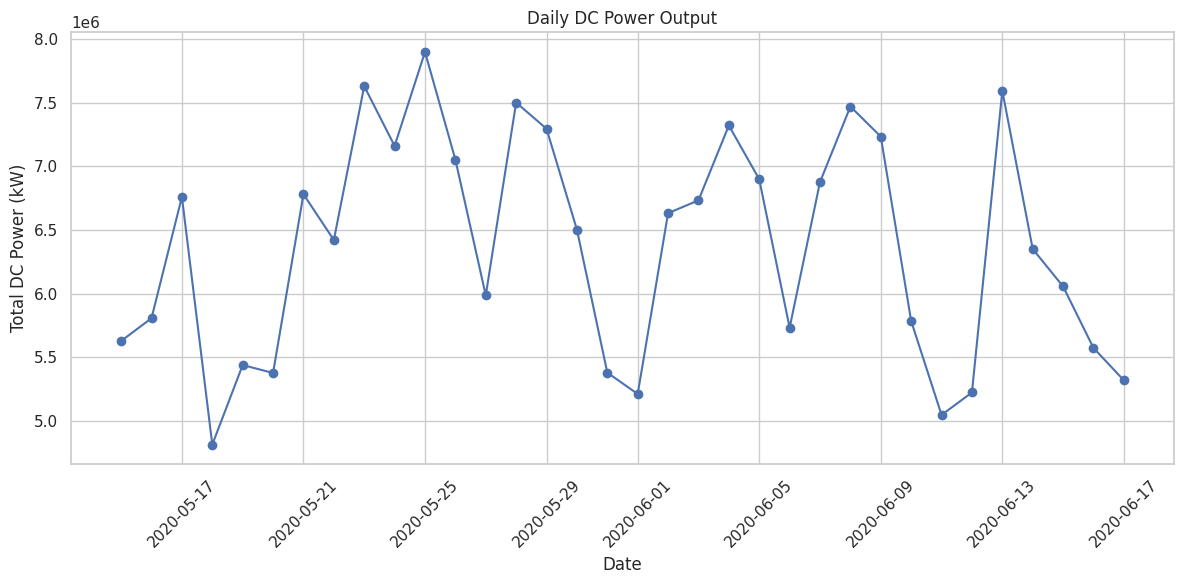

In [11]:

plt.figure(figsize=(12,6))
plt.plot(daily_output.index, daily_output.values, marker='o')
plt.title('Daily DC Power Output')
plt.xlabel('Date')
plt.ylabel('Total DC Power (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

## ✅ Next Steps
- Join with weather data
- Analyze efficiency (DC/AC ratio)
- Build forecasting model

## 🔄 Merge Weather Data

In [15]:

weather_df = pd.read_csv('/content/Plant_1_Weather_Sensor_Data.csv')
weather_df['DATE_TIME'] = pd.to_datetime(weather_df['DATE_TIME'])
weather_df = weather_df.sort_values('DATE_TIME')
merged_df = pd.merge(gen_df, weather_df, on='DATE_TIME', how='inner')
merged_df.to_csv('/content/clean_plant1_data.csv', index=False)
merged_df.head()


,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,zVJPv84UY57bAof,0.0,0.0,0.0,7116151.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,zBIq5rxdHJRwDNY,0.0,0.0,0.0,6339380.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,0.0,7007866.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,wCURE6d3bPkepu2,0.0,0.0,0.0,6782598.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


## 📊 Correlation Heatmap

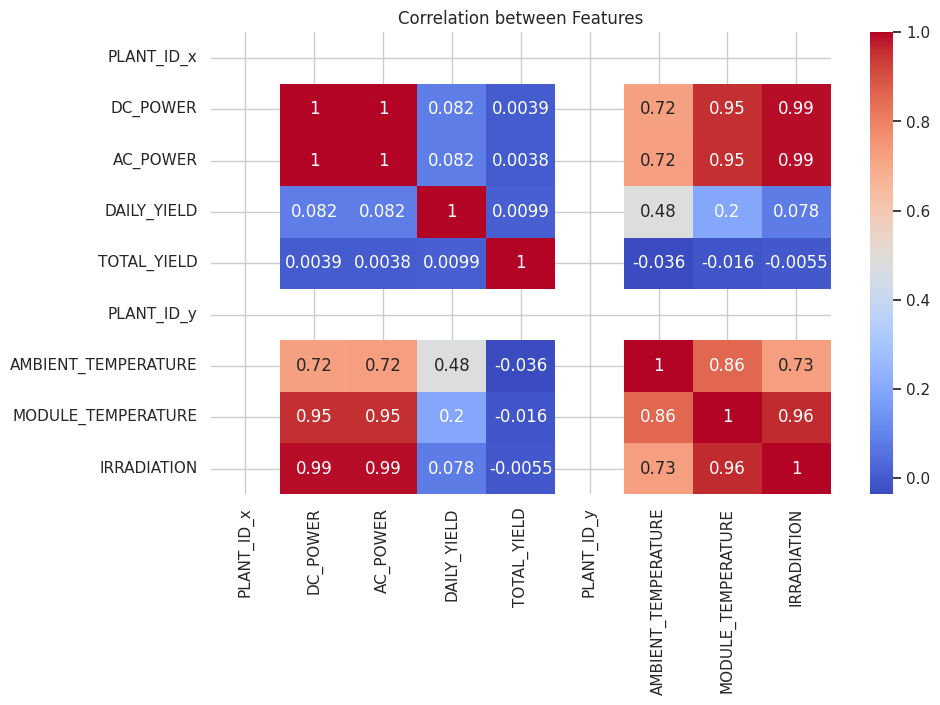

In [16]:

import numpy as np
plt.figure(figsize=(10,6))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()


## ☀️ Irradiation vs DC Power

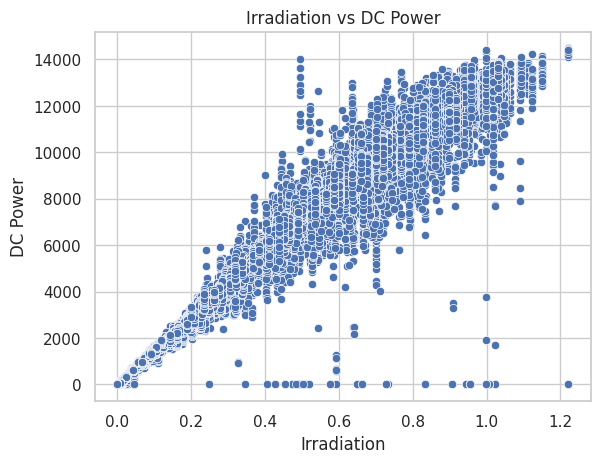

In [17]:

sns.scatterplot(data=merged_df, x='IRRADIATION', y='DC_POWER')
plt.title('Irradiation vs DC Power')
plt.xlabel('Irradiation')
plt.ylabel('DC Power')
plt.show()


## ⚡ Efficiency Over Time

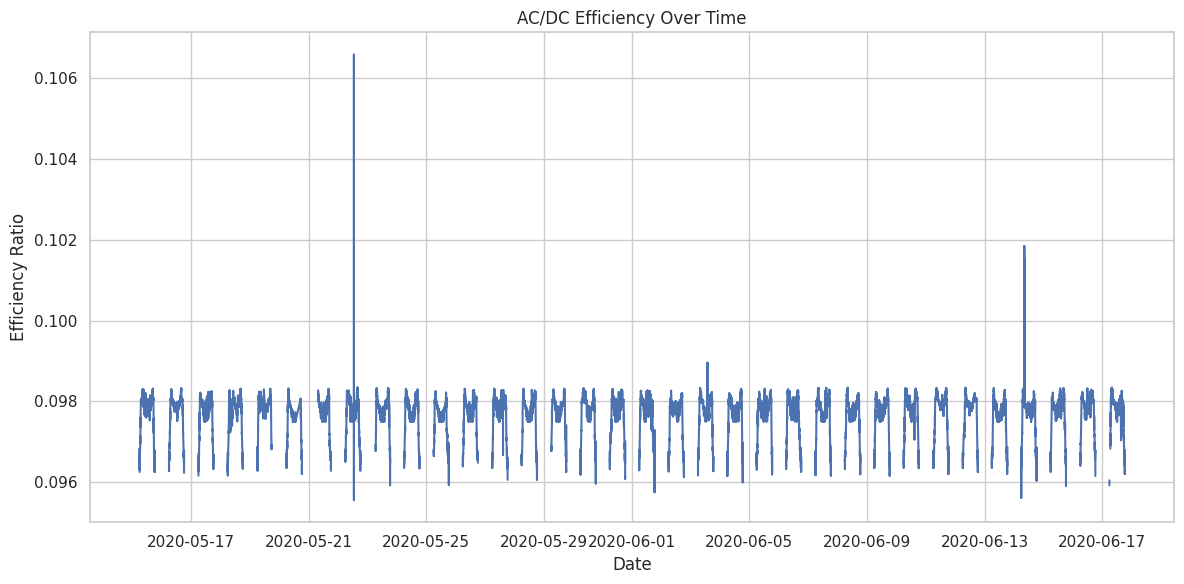

In [18]:

merged_df['EFFICIENCY'] = merged_df['AC_POWER'] / merged_df['DC_POWER']
plt.figure(figsize=(12,6))
plt.plot(merged_df['DATE_TIME'], merged_df['EFFICIENCY'])
plt.title('AC/DC Efficiency Over Time')
plt.xlabel('Date')
plt.ylabel('Efficiency Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()
